## Demonstrate opening OMI files from  NASA GES DISC with xarray

In [1]:
# Import Python packages (tools for working with geospatial data)
import xarray
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook
%qtconsole

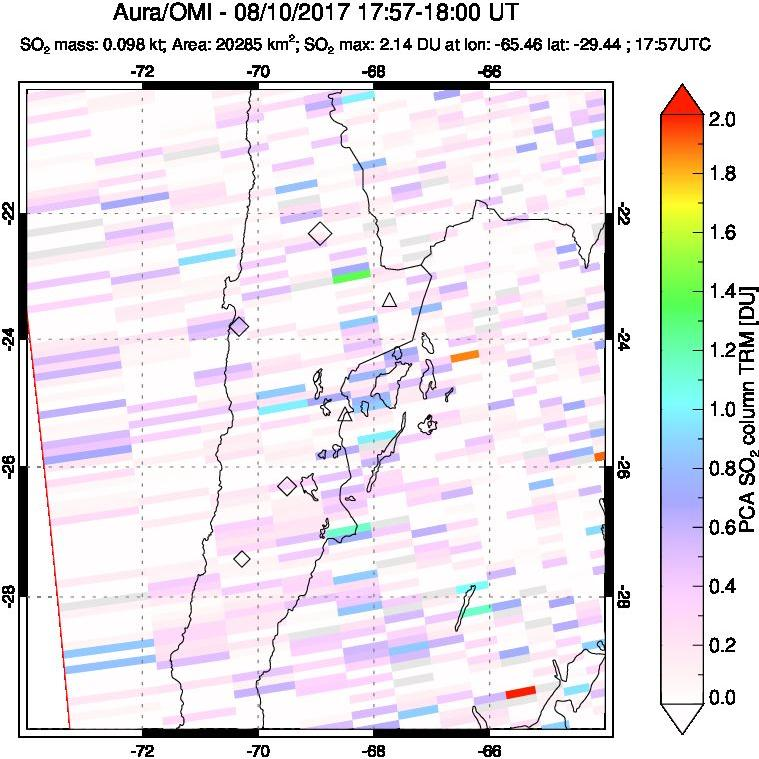

In [2]:
# Try to reproduce figure from SO2 omi page:
# https://so2.gsfc.nasa.gov
# https://so2.gsfc.nasa.gov/pix/daily/ixxxza/loopall5pca.php?yr=17&mo=08&dy=10&bn=nchile
from IPython.display import Image
Image("https://so2.gsfc.nasa.gov/pix/daily/0817/nchile_so2pca_5k_20170810.jpg")

## Get data

There are lots of places to get data. This website has a summary:
[https://disc.sci.gsfc.nasa.gov/datasets/OMSO2e_V003/summary](https://disc.sci.gsfc.nasa.gov/datasets/OMSO2e_V003/summary)

In [4]:
# Download a file from GES DISC. Options for HDF5EOS or NetCDF formats:

#!wget http://acdisc.gesdisc.eosdis.nasa.gov/data///Aura_OMI_Level3/OMSO2e.003/2017/OMI-Aura_L3-OMSO2e_2017m0810_v003-2017m0812t040155.he5
#OMI-Aura_L3-OMSO2e_2017m0810_v003-2017m0812t040155.he5
#OMI-Aura_L3-OMSO2e_2017m0810_v003-2017m0812t040155.he5.nc

## Level 3 (global gridded)

In [5]:
!gdalinfo OMI-Aura_L3-OMSO2e_2017m0810_v003-2017m0812t040155.he5

Driver: HDF5/Hierarchical Data Format Release 5
Files: OMI-Aura_L3-OMSO2e_2017m0810_v003-2017m0812t040155.he5
Size is 512, 512
Coordinate System is `'
Metadata:
  HDFEOS_ADDITIONAL_FILE_ATTRIBUTES_EndUTC=2017-08-11T11:45:00.000000Z
  HDFEOS_ADDITIONAL_FILE_ATTRIBUTES_GranuleDay=10 
  HDFEOS_ADDITIONAL_FILE_ATTRIBUTES_GranuleDayOfYear=222 
  HDFEOS_ADDITIONAL_FILE_ATTRIBUTES_GranuleMonth=8 
  HDFEOS_ADDITIONAL_FILE_ATTRIBUTES_GranuleYear=2017 
  HDFEOS_ADDITIONAL_FILE_ATTRIBUTES_InputPointer=OMI-Aura_L2G-OMSO2G_2017m0809_v003-2017m0810t071256.he5 OMI-Aura_L2G-OMSO2G_2017m0810_v003-2017m0811t063909.he5 OMI-Aura_L2G-OMSO2G_2017m0811_v003-2017m0812t065906.he5
  HDFEOS_ADDITIONAL_FILE_ATTRIBUTES_InstrumentName=OMI
  HDFEOS_ADDITIONAL_FILE_ATTRIBUTES_OrbitNumber=69502 69503 69504 69505 69506 69507 69508 69509 69510 69511 69512 69513 69514 69515 69516 69517 69518 69519 69520 69521 69522 69523 69524 69525 69526 69527 69528 69529 69530 69531 69532 69533 69534 69535 69536 69537 69538 69539 69540

In [6]:
!gdalinfo OMI-Aura_L3-OMSO2e_2017m0810_v003-2017m0812t040155.he5.nc 

Warning 1: No UNIDATA NC_GLOBAL:Conventions attribute
Driver: netCDF/Network Common Data Format
Files: OMI-Aura_L3-OMSO2e_2017m0810_v003-2017m0812t040155.he5.nc
Size is 512, 512
Coordinate System is `'
Metadata:
  NC_GLOBAL#HDFEOS_ADDITIONAL_FILE_ATTRIBUTES.EndUTC=2017-08-11T11:45:00.000000Z
  NC_GLOBAL#HDFEOS_ADDITIONAL_FILE_ATTRIBUTES.fullnamepath=/HDFEOS/ADDITIONAL/FILE_ATTRIBUTES
  NC_GLOBAL#HDFEOS_ADDITIONAL_FILE_ATTRIBUTES.GranuleDay=10
  NC_GLOBAL#HDFEOS_ADDITIONAL_FILE_ATTRIBUTES.GranuleDayOfYear=222
  NC_GLOBAL#HDFEOS_ADDITIONAL_FILE_ATTRIBUTES.GranuleMonth=8
  NC_GLOBAL#HDFEOS_ADDITIONAL_FILE_ATTRIBUTES.GranuleYear=2017
  NC_GLOBAL#HDFEOS_ADDITIONAL_FILE_ATTRIBUTES.InputPointer=OMI-Aura_L2G-OMSO2G_2017m0809_v003-2017m0810t071256.he5 OMI-Aura_L2G-OMSO2G_2017m0810_v003-2017m0811t063909.he5 OMI-Aura_L2G-OMSO2G_2017m0811_v003-2017m0812t065906.he5
  NC_GLOBAL#HDFEOS_ADDITIONAL_FILE_ATTRIBUTES.InstrumentName=OMI
  NC_GLOBAL#HDFEOS_ADDITIONAL_FILE_ATTRIBUTES.OrbitNumber={69502,69503

## Read data with xarray

http://xarray.pydata.org/en/stable/


In [7]:
filepath = 'OMI-Aura_L3-OMSO2e_2017m0810_v003-2017m0812t040155.he5'
ds = xarray.open_dataset(filepath)

In [8]:
ds

<xarray.Dataset>
Dimensions:  ()
Data variables:
    *empty*

In [33]:
#augmented file still not read... I think you have to 'augment', then after convert to netcdf
#!~/Software/aug_eos5 test/OMI-Aura_L3-OMSO2e_2017m0810_v003-2017m0812t040155.he5
#filepath = 'test/OMI-Aura_L3-OMSO2e_2017m0810_v003-2017m0812t040155.he5' 
filepath = 'test/OMI-Aura_L3-OMSO2e_2017m0810_v003-2017m0812t040155.he5.nc4' 
ds = xarray.open_dataset(filepath)
ds

<xarray.Dataset>
Dimensions:  ()
Data variables:
    *empty*

In [14]:
filepath = 'OMI-Aura_L3-OMSO2e_2017m0810_v003-2017m0812t040155.he5.nc'
ds = xarray.open_dataset(filepath)

In [16]:
ds

<xarray.Dataset>
Dimensions:                 (lat: 720, lon: 1440, nDiagnostic: 3)
Coordinates:
  * lon                     (lon) float32 -179.875 -179.625 -179.375 ...
  * lat                     (lat) float32 -89.875 -89.625 -89.375 -89.125 ...
  * nDiagnostic             (nDiagnostic) int32 0 1 2
Data variables:
    ColumnAmountO3          (lat, lon) float64 nan nan nan nan nan nan nan ...
    ColumnAmountSO2_PBL     (lat, lon) float64 nan nan nan nan nan nan nan ...
    LineNumber              (lat, lon) float64 nan nan nan nan nan nan nan ...
    OrbitNumber             (lat, lon) float64 nan nan nan nan nan nan nan ...
    PacificSectorAverage    (nDiagnostic, lat) float64 nan nan nan nan nan ...
    RadiativeCloudFraction  (lat, lon) float64 nan nan nan nan nan nan nan ...
    RelativeAzimuthAngle    (lat, lon) float64 nan nan nan nan nan nan nan ...
    SceneNumber             (lat, lon) float64 nan nan nan nan nan nan nan ...
    SlantColumnAmountSO2    (lat, lon) float64 nan 

In [17]:
# WARNING: do not run this, it will crash the computer attempting to load everything into memory
#df = ds.to_dataframe() 
# http://xarray.pydata.org/en/stable/examples/weather-data.html
# This could be useful for GPS time series analysis

### Notes

The data just has lon and lat coordinates, not time. You can add a time dimension and do a lot of useful analysis here:
http://xarray.pydata.org/en/stable/examples/multidimensional-coords.html



In [18]:
# Dimensions of data 'cube'
ds.dims

Frozen(SortedKeysDict({'lat': 720, 'lon': 1440, 'nDiagnostic': 3}))

In [19]:
# Extract a particular subdataset
ds.ColumnAmountSO2_PBL

<xarray.DataArray 'ColumnAmountSO2_PBL' (lat: 720, lon: 1440)>
array([[ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       ..., 
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan]])
Coordinates:
  * lon      (lon) float32 -179.875 -179.625 -179.375 -179.125 -178.875 ...
  * lat      (lat) float32 -89.875 -89.625 -89.375 -89.125 -88.875 -88.625 ...
Attributes:
    units:                  D.U.
    title:                  Vertical Column Amount SO2 (PBL)
    UniqueFieldDefinition:  OMI-Specific
    valid_range:            [  -10.  2000.]
    origname:               ColumnAmountSO2_PBL
    fullnamepath:           /HDFEOS/GRIDS/OMI Total Column Amount SO2/Data Fi...
    orig_dimname_list:      YDim XDim

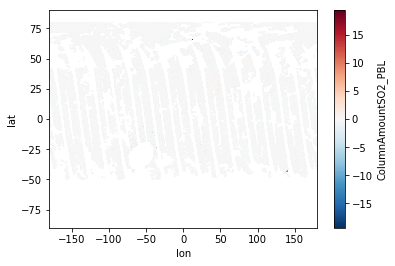

In [24]:
# Plot the data 
# NOTE: doesn't work with %matplotlib notebook interactive plots, need to change colorscale
%matplotlib inline
ds.ColumnAmountSO2_PBL.plot()

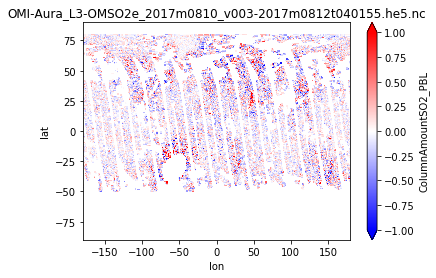

In [30]:
# Change colorscale
subset = ds.ColumnAmountSO2_PBL
subset.plot(vmin=-1, vmax=1, cmap='bwr')
plt.title(filepath)
#plt.clim(-5, 5)

In [31]:
# xarray works well with cartopy for mapping
# http://xarray.pydata.org/en/stable/auto_gallery/plot_cartopy_facetgrid.html#sphx-glr-auto-gallery-plot-cartopy-facetgrid-py
''' 
import cartopy.crs as ccrs

map_proj = ccrs.PlateCarree()

p = subset.plot(transform=ccrs.PlateCarree(),  # the data's projection
             #col='time', col_wrap=1,  # multiplot settings
             #aspect=subset.dims['lon']/subset.dims['lat'],  # for a sensible figsize
             #subplot_kws={'projection': map_proj})  
             
'''

" \nimport cartopy.crs as ccrs\n\nmap_proj = ccrs.PlateCarree()\n\np = subset.plot(transform=ccrs.PlateCarree(),  # the data's projection\n             #col='time', col_wrap=1,  # multiplot settings\n             #aspect=subset.dims['lon']/subset.dims['lat'],  # for a sensible figsize\n             #subplot_kws={'projection': map_proj})  \n             \n"

In [ ]:
# Working with RASTERIO
#http://xarray.pydata.org/en/stable/auto_gallery/plot_rasterio.html#sphx-glr-auto-gallery-plot-rasterio-py

## Try level 2

In [ ]:
8*8
